![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 12 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [137]:
import pandas as pd
import numpy as np
from numpy import random
import pandas as pd
from datetime import datetime
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 

pd.options.display.float_format = '{:.0f}'.format

### <span style="color:black">Exercici 1.</span>

__Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu:__ <span style="color:blue">__[X] Fet__</span>

In [158]:
file=pd.read_csv("DelayedFlights.csv", sep=",", encoding='utf8')

In [139]:
file.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


In [140]:
file.describe().round(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758,1936758,1936758,1936758,1936758,1936758,1936758,1929648,1936758,1936758,...,1936758,1929648,1936303,1936758,1936758,1247488,1247488,1247488,1247488,1247488
mean,3341651,2008,6,16,4,1519,1467,1610,1634,2184,...,766,7,18,0,0,19,4,15,0,25
std,2066065,0,3,9,2,450,425,548,465,1945,...,574,5,14,0,0,44,21,34,2,42
min,0,2008,1,1,1,1,0,1,0,1,...,11,0,0,0,0,0,0,0,0,0
25%,1517452,2008,3,8,2,1203,1135,1316,1325,610,...,338,4,10,0,0,0,0,0,0,0
50%,3242558,2008,6,16,4,1545,1510,1715,1705,1543,...,606,6,14,0,0,2,0,2,0,8
75%,4972467,2008,9,23,6,1900,1815,2030,2014,3422,...,998,8,21,0,0,21,0,15,0,33
max,7009727,2008,12,31,7,2400,2359,2400,2400,9742,...,4962,240,422,1,1,2436,1352,1357,392,1316


In [141]:
file.shape

(1936758, 30)

In [142]:
file.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [143]:
# A continuación, vemos que la columna 'Unnamed' no aporta nada, no es más que un contador de filas, así que pasaremos a 
# eliminarla. 

file['Unnamed: 0'].value_counts()

0          1
6846151    1
2232597    1
5967571    1
2242832    1
          ..
4495774    1
6925369    1
3917269    1
3919316    1
2047       1
Name: Unnamed: 0, Length: 1936758, dtype: int64

In [144]:
file.drop(['Unnamed: 0'], axis=1, inplace=True)

In [145]:
# Miramos los valores NaN que tienen las columnas

total_nan_values = file.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [146]:
# Vamos a tratar los valores NaN de dos maneras: las columnas que representa una hora concreta ('ArrTime') o el código de 
# una compañía aérea ('TailNum') las vamos a borrar (solo representan un 0.3% del total de los datos); las columnas con valores 
# en minutos, vamos a sustituir los NaN's por la media aritmética. 

file = file.dropna(subset=['ArrTime', 'TailNum'])

In [147]:
# Sustituimos los datos NaN por la media aritmética

#file=file.fillna(file.mean())

In [148]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929645 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [149]:
# Pasamos a GRAFICAR: a través de la matriz de correlación podemos ver cómo algunas de las 29 variables del conjunto de datos 
# presentan multicolinealidad, es decir, pueden predecirse linealmente a partir de las demás.

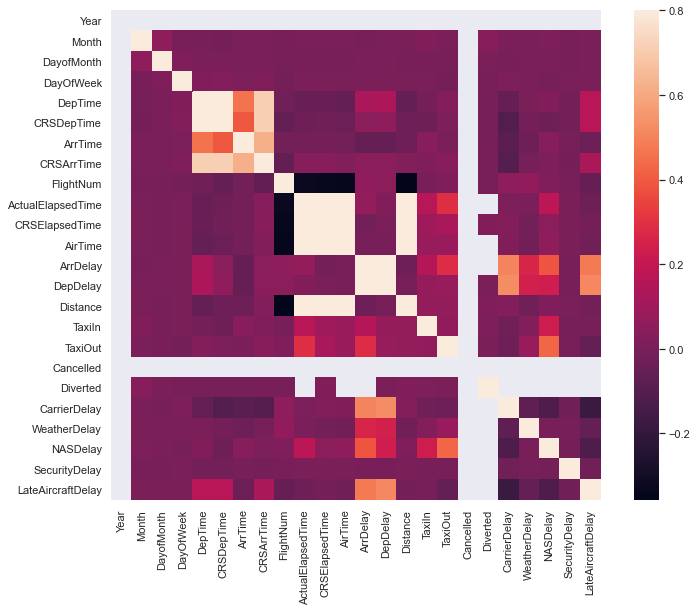

In [150]:
# Matriz de correlación  #

corrmat = file.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


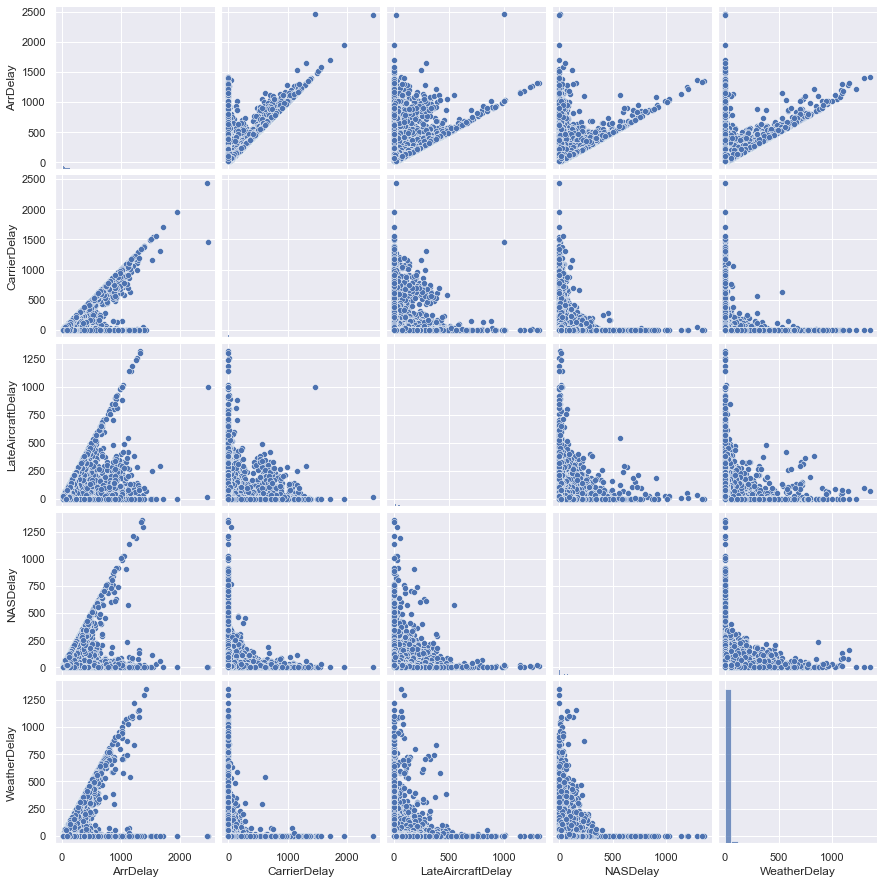

In [151]:
# Scatterplot #

# La matriz de correlación anterior indentifica las tres variables principales que generan los retrasos: Late Aircraft Delay, 
# Carrier Delay and NAS Delay. El scatterplot corrobora este supuesto, mostrando cómo esas tres variables crean la mayoría de 
# los retrasos durante el año.

# Antes de graficar, creamos la columna Status que representa si el vuela llegó en hora (0), con un poco retrasado (1), 
# con mucho retrasado (2), desviado (3) o cancelado (4)

for dataset in file:
    file.loc[file['ArrDelay'] <= 15, 'Status'] = 0
    file.loc[file['ArrDelay'] >= 15, 'Status'] = 1
    file.loc[file['ArrDelay'] >= 60, 'Status'] = 2
    file.loc[file['Diverted'] == 1, 'Status'] = 3
    file.loc[file['Cancelled'] == 1, 'Status'] = 4

sns.set()
Delayedflights = file[(file.Status >= 1) & (file.Status < 3)]
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

In [152]:
# Una vez realizada una pequeña exploración inicial, pasamos a dividir el dataframe con el método train_test_split

train, test = train_test_split(file, test_size = 0.30, random_state=4)

print("Ejemplos usados para Train: ", len(train))
print("Ejemplos usados para Test: ", len(test))

Ejemplos usados para Train:  1350751
Ejemplos usados para Test:  578894


In [153]:
train.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
count,1350751,1350751,1350751,1350751,1350751,1350751,1350751,1350751,1350751,1349869,...,1350751,1350751,1350751,1350751,873305,873305,873305,873305,873305,1350751
mean,2008,6,16,4,1519,1468,1610,1634,2184,133,...,7,18,0,0,19,4,15,0,25,1
std,0,3,9,2,450,425,548,465,1944,72,...,5,14,0,0,43,22,34,2,42,1
min,2008,1,1,1,1,0,1,0,1,15,...,0,0,0,0,0,0,0,0,0,0
25%,2008,3,8,2,1203,1135,1316,1325,611,80,...,4,10,0,0,0,0,0,0,0,0
50%,2008,6,16,4,1545,1510,1715,1705,1543,116,...,6,14,0,0,2,0,2,0,8,1
75%,2008,9,23,6,1900,1815,2030,2014,3422,165,...,8,21,0,0,21,0,15,0,33,1
max,2008,12,31,7,2400,2359,2400,2359,9740,1114,...,240,422,0,1,1951,1297,1357,392,1303,3


In [154]:
test.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
count,578894,578894,578894,578894,578894,578894,578894,578894,578894,578499,...,578894,578894,578894,578894,374181,374181,374181,374181,374181,578894
mean,2008,6,16,4,1519,1468,1610,1634,2185,133,...,7,18,0,0,19,4,15,0,25,1
std,0,3,9,2,451,425,548,465,1946,72,...,5,14,0,0,44,21,34,2,42,1
min,2008,1,1,1,1,0,1,0,1,14,...,0,0,0,0,0,0,0,0,0,0
25%,2008,3,8,2,1203,1135,1315,1325,610,80,...,4,10,0,0,0,0,0,0,0,0
50%,2008,6,16,4,1545,1510,1715,1706,1543,116,...,6,14,0,0,2,0,2,0,8,1
75%,2008,9,23,6,1901,1815,2031,2015,3423,165,...,8,21,0,0,21,0,14,0,33,1
max,2008,12,31,7,2400,2359,2400,2359,9741,790,...,200,383,0,1,2436,1352,1030,357,1316,3


### <span style="color:black">Exercici 2.</span>

__Aplica algun procés de transformació (estandaritzar les dades numèriques, crear columnes dummies, polinomis...):__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# VAMOS A NORMALIZAR EL ATRIBUTO CATEGÓRICO CANCELLATIONCODE CON LA FUNCIÓN DUMMY #

In [159]:
file['CancellationCode'].value_counts()

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

In [160]:
cancelCode_dummy= pd.get_dummies(file["CancellationCode"])

In [161]:
cancelCode_dummy.head(3)

,A,B,C,N
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1


In [162]:
cancelCode_dummy.rename(columns = {'A':'CancellationCarrier', 'B':'CancellationWeather',
                              'C':'Cancellation_NAS'}, inplace = True)

In [ ]:
# Eliminamos la columna CancellationCode y procederemos a continuación a concatenar el nuevo DF cancelCode_dummy

file=file.drop('CancellationCode', axis='columns')

In [168]:
# Comprobamos que la columna CancellationCode ya no está en el DF

file.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [169]:
# Por último, concatenamos ambos DF's para trabajar con un único dataset

file_= pd.concat([file, cancelCode_dummy], axis=1)
file_.head(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCarrier,CancellationWeather,Cancellation_NAS,N
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,0,NaN,NaN,NaN,NaN,NaN,0,0,0,1
1,1,2008,1,3,4,754,735,1002,1000,WN,...,0,NaN,NaN,NaN,NaN,NaN,0,0,0,1
2,2,2008,1,3,4,628,620,804,750,WN,...,0,NaN,NaN,NaN,NaN,NaN,0,0,0,1


In [170]:
file_.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'CancellationCarrier',
       'CancellationWeather', 'Cancellation_NAS', 'N'],
      dtype='object')

In [64]:
# VAMOS A NORMALIZAR LOS ATRIBUTOS NUMÉRICOS ARRDELAY Y DEPDELAY CON STANDARDSCALER #

In [171]:
file_ss=file[['ArrDelay', 'DepDelay']].copy()

In [172]:
ss = StandardScaler()
file_transformed = ss.fit_transform(file_ss)
file_transformed

array([[-0.98970118, -0.65886773],
       [-0.70793514, -0.45288482],
       [-0.49661061, -0.65886773],
       ...,
       [ 1.00027146,  0.68938404],
       [-0.5846625 , -0.60269057],
       [-0.83120778, -0.67759345]])

In [173]:
file_transformed = pd.DataFrame(file_transformed)

In [174]:
file_transformed.head(3)

,0,1
0,-1,-1
1,-1,-0
2,-0,-1


In [175]:
file_transformed.rename(columns = {0:'ArrDelay', 1:'DepDelay'}, inplace = True)

In [176]:
file_transformed.head(3)

,ArrDelay,DepDelay
0,-1,-1
1,-1,-0
2,-0,-1


In [177]:
file_ok=file_.drop(['ArrDelay', 'DepDelay'], axis='columns')

In [178]:
file_scaled= pd.concat([file_ok, file_transformed], axis=1)
file_scaled.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCarrier,CancellationWeather,Cancellation_NAS,N,ArrDelay,DepDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,NaN,NaN,NaN,NaN,0,0,0,1,-1,-1
1,1,2008,1,3,4,754,735,1002,1000,WN,...,NaN,NaN,NaN,NaN,0,0,0,1,-1,-0
2,2,2008,1,3,4,628,620,804,750,WN,...,NaN,NaN,NaN,NaN,0,0,0,1,-0,-1
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,0,0,0,32,0,0,0,1,-0,-0
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,NaN,NaN,NaN,NaN,0,0,0,1,-1,-0


In [179]:
file_scaled.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Origin',
       'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'CancellationCarrier', 'CancellationWeather',
       'Cancellation_NAS', 'N', 'ArrDelay', 'DepDelay'],
      dtype='object')

In [180]:
file_scaled.shape

(1936758, 33)

### <span style="color:black">Exercici 3.</span>

__Resumeix les noves columnes generades de manera estadística i gràfica:__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# COLUMNAS DUMMIES #

In [181]:
# Las columnas generadas con dummies son columnas con datos binarios, es decir, con valores 0 o 1. Por tanto, y como vemos a 
# continuación, su resumen estadístico se basan en establecer su valor min, que obviamente es cero, el valor max, que es 1,
# y contar el número de valores. Vemos que no existe media, ni desviación estándar, ni cuartiles en las columnas dummies. 

file_scaled['CancellationWeather'].describe()

count   1936758
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           1
Name: CancellationWeather, dtype: float64

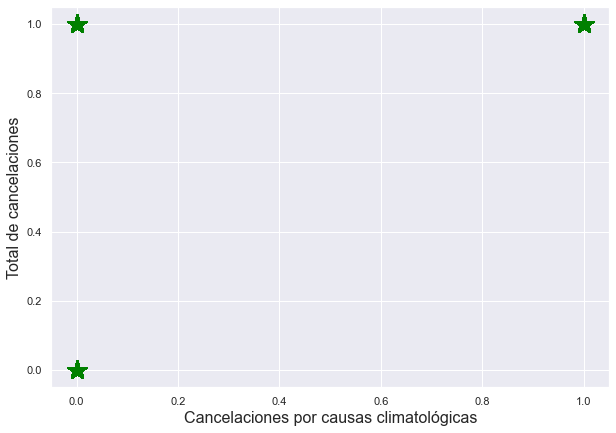

In [182]:
# Gráficamente, al representar una columna dummy, vemos que simplemente se representan valores absolutos (0 y 1). En este caso 
# he querido comparar las cancelaciones causadas por problemas meteorológicos (X) versus el total de cancelaciones (y).

x = file_scaled['CancellationWeather']
y = file_scaled['Cancelled']

plt.subplots(figsize=(10, 7))
plt.xlabel('Cancelaciones por causas climatológicas', size=16)
plt.ylabel('Total de cancelaciones', size=16)
plt.plot(x,y,'*',markersize=20, color='green')

In [77]:
# Para representar un gráfico que nos proporcione información con las columnas dummies que hemos creado, por ejemplo, qué % de
# cancelaciones han sido causadas por problemas meteorológicos, cuales por problemas de la compañía aérea y cuales por NAS  
# (National Air System de USA) vamos a tener que trabajar un poco más... utilizaremos un pieplot.

In [185]:
# Contamos el números de vuelos totales cancelados con código de "Motivo de cancelación" y los pasamos a DF

NAS=(file_scaled['Cancellation_NAS'].value_counts()).to_list()
Weather=(file_scaled['CancellationWeather'].value_counts()).to_list()
Carrier=(file_scaled['CancellationCarrier'].value_counts()).to_list()

In [186]:
# A continuación pasamos los datos de cada motivo de cancelación a lista, y hacemos una lista total que incluye el número de
# vuelos de cancelados por cada causa. Y por último, graficamos.


NAS=NAS[1:]
NAS

[80]

In [187]:
Weather=Weather[1:]
Weather

[307]

In [188]:
Carrier=Carrier[1:]
Carrier

[246]

In [189]:
DF=NAS+Weather+Carrier

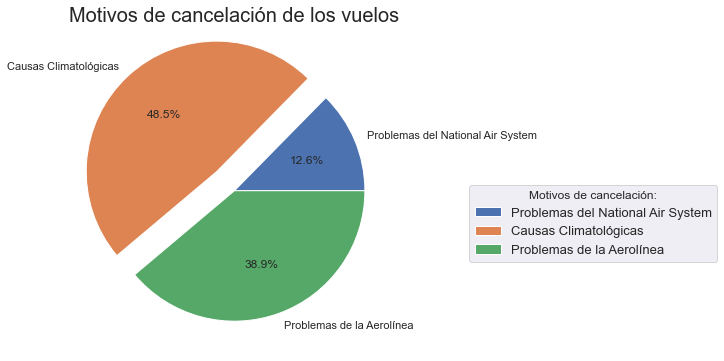

In [194]:
# PiePlot #

mylabels = ["Problemas del National Air System",'Causas Climatológicas', 'Problemas de la Aerolínea']
plt.title('Motivos de cancelación de los vuelos', fontsize=20)
plt.rcParams["figure.figsize"] = (10, 6)
myexplode = [0, 0.2, 0, ]
fig=plt.pie(DF, autopct='%1.1f%%', labels=mylabels, explode= myexplode)
plt.legend(title = "Motivos de cancelación:", fontsize= 13, loc = 'right', bbox_to_anchor = (1, -0.1, 1, 1))
plt.show()

In [ ]:
# COLUMNAS ESTANDARIZADAS CON STANDARSCALER #

In [ ]:
# Cuando realizamos estandarización de valores numéricos, a diferencia que ocurre con la normalización de valores categóricos
# con dummy, vemos que el resumen estadítico no muestra que se traten de variables con valores binarios, sino que tiene su 
# media, deviación estándar, los cuartiles, valores mínimos y máximos, etc. y podremos operar con ellos como si de datos 
# absolutos se trataran.

In [215]:
pd.options.display.float_format = '{:.2f}'.format

file_scaled['ArrDelay'].describe(), file_scaled['DepDelay'].describe()

(count   1928371.00
 mean         -0.00
 std           1.00
 min          -2.66
 25%          -0.58
 50%          -0.32
 75%           0.24
 max          42.60
 Name: ArrDelay, dtype: float64,
 count   1936758.00
 mean          0.00
 std           1.00
 min          -0.70
 25%          -0.58
 50%          -0.36
 75%           0.18
 max          45.39
 Name: DepDelay, dtype: float64)

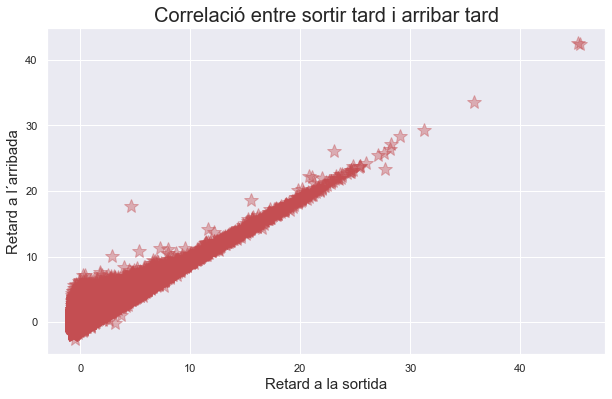

In [226]:
# Fent el gràfic observem que hi ha una correlació lineal entre sortir tard y arribar tard en destí.

y=file_scaled['ArrDelay']
x=file_scaled['DepDelay']

plt.plot(x,y, 'r*', alpha= 0.4, markersize=15)
plt.ylabel('Retard a l´arribada', fontsize=15)
plt.xlabel('Retard a la sortida', fontsize=15)
plt.title('Correlació entre sortir tard i arribar tard', fontsize=20)
plt.show()

### <span style="color:black">Exercici 4.</span>

__Exporta el Notebook com a pdf i com a html:__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# Exportar Notebook a html --> Menú/File/Download as HTML

In [191]:
# Exportar Notebook a pdf --> Instalamos en la consola 'python -m pip install -U notebook-as-pdf' y 'pyppeteer-install'
# Una vez instalado, vamos a Menú/File/Download as PDF via HTML